<a href="https://colab.research.google.com/github/xiaorui777/CV/blob/master/Pytorch_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pytorch 实现分类问题

In [0]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [0]:
# 生成数据
n_data = torch.ones(100,2)
x0 = torch.normal(2*n_data, 1)
y0 = torch.zeros(100)
x1 = torch.normal(-2*n_data,1)
y1 = torch.ones(100)
x = torch.cat((x0,x1),0).type(torch.FloatTensor) # FloatTensor = 32-bit floating
y = torch.cat((y0,y1)).type(torch.LongTensor) # LongTensor = 64-bit integer

In [0]:
x, y = Variable(x), Variable(y)

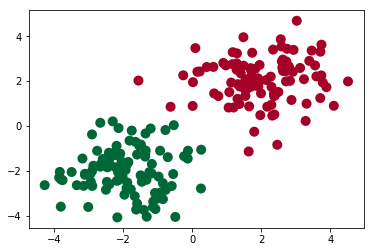

In [11]:
plt.scatter(x.data.numpy()[:,0], x.data.numpy()[:,1], c=y.data.numpy(), s=100,lw=0, cmap='RdYlGn')

In [12]:
# 定义网络 method 1
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden,n_output):
        super(Net,self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)
        self.out = torch.nn.Linear(n_hidden, n_output)
    
    def forward(self, x):
        x = torch.relu(self.hidden(x))  # 这里的relu类似function 一个功能
        x = self.out(x)
        return x

net1 = Net(n_feature=2, n_hidden=10, n_output=2)
print(net1)

Net(
  (hidden): Linear(in_features=2, out_features=10, bias=True)
  (out): Linear(in_features=10, out_features=2, bias=True)
)


In [13]:
# 定义网络 method 2
net2 = torch.nn.Sequential(
    torch.nn.Linear(2,10),
    torch.nn.ReLU(),
    torch.nn.Linear(10,2),
)
print(net2)

Sequential(
  (0): Linear(in_features=2, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=2, bias=True)
)


In [0]:
# 优化: 随机梯度下降  Loss：交叉熵
optimizer = torch.optim.SGD(net1.parameters(), lr=0.02)
loss_func = torch.nn.CrossEntropyLoss()

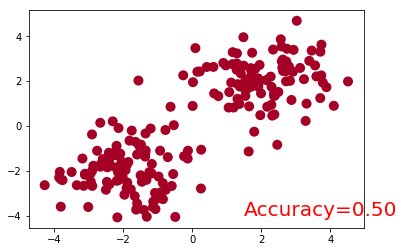

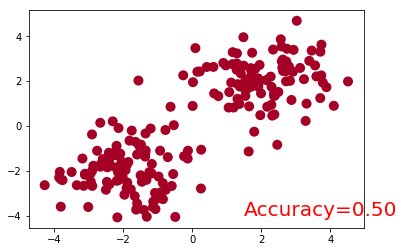

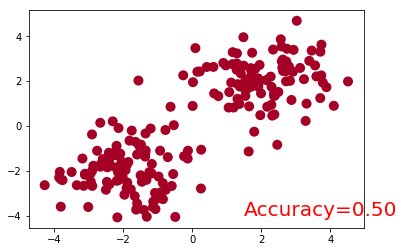

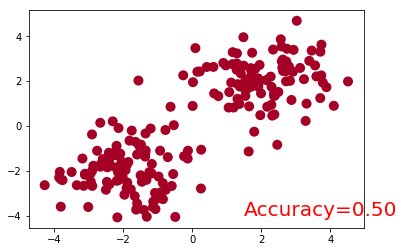

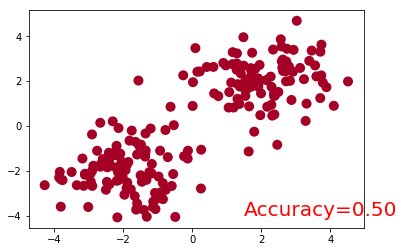

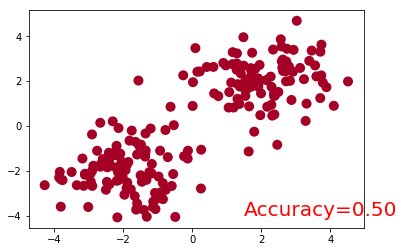

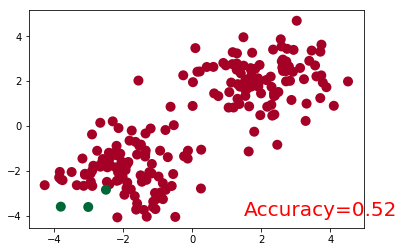

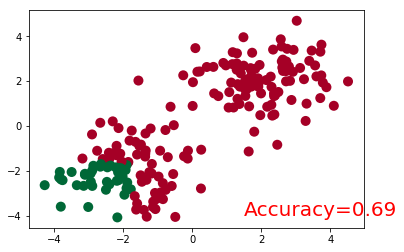

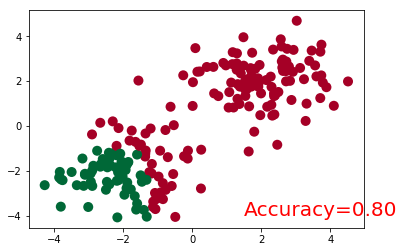

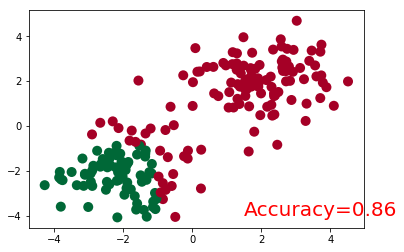

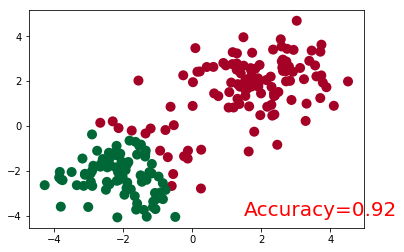

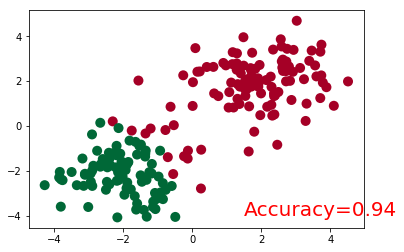

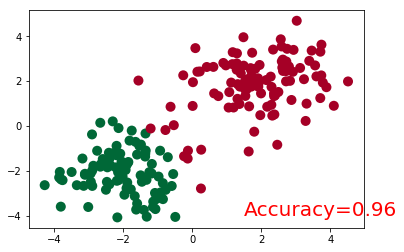

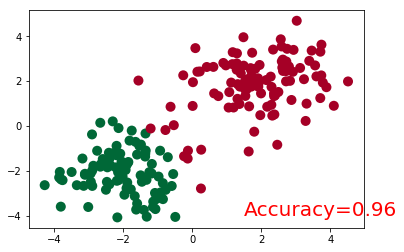

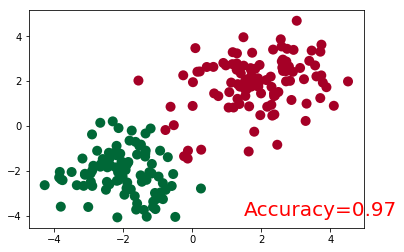

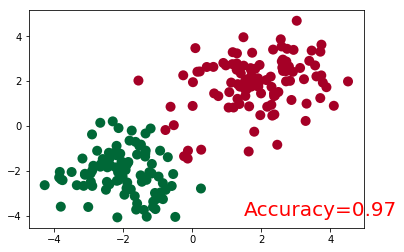

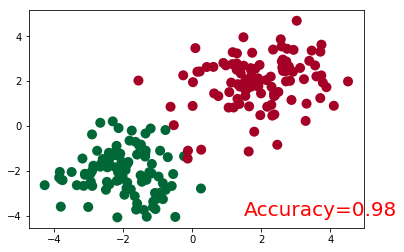

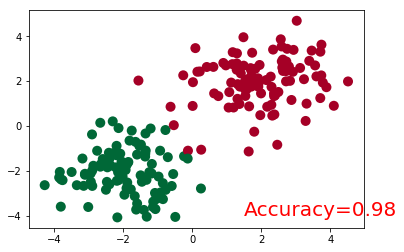

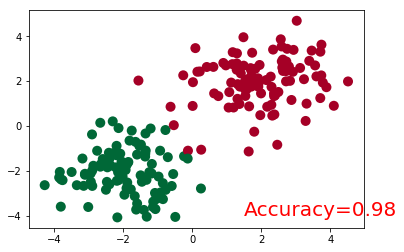

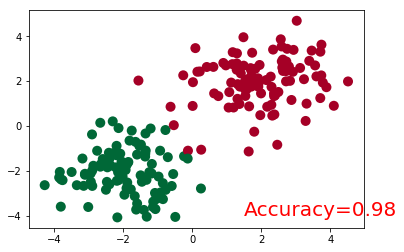

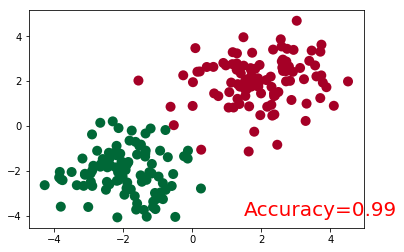

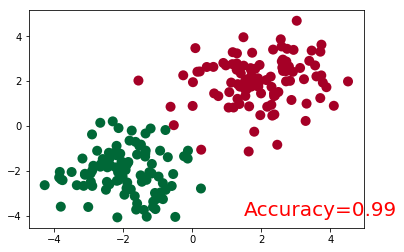

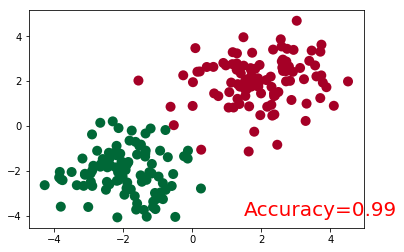

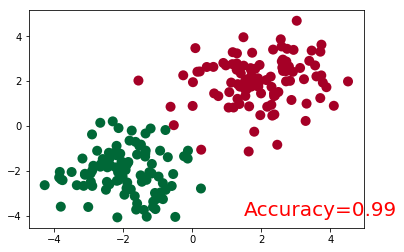

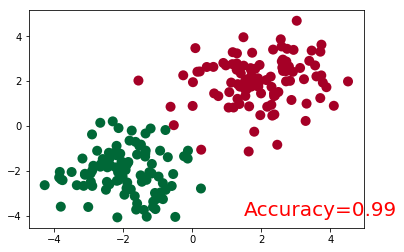

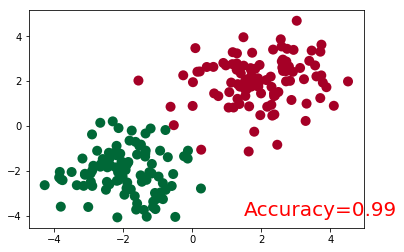

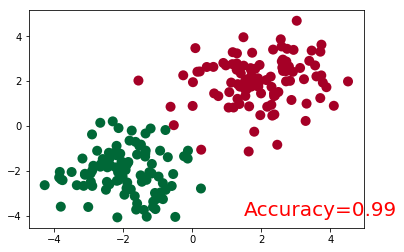

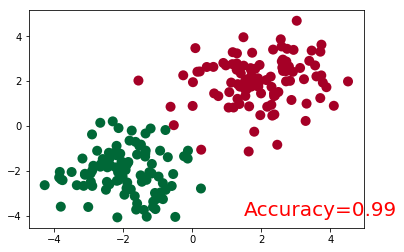

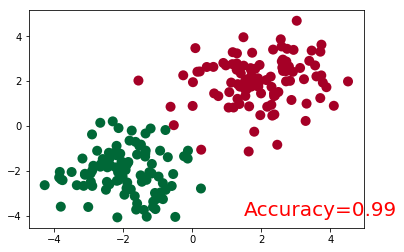

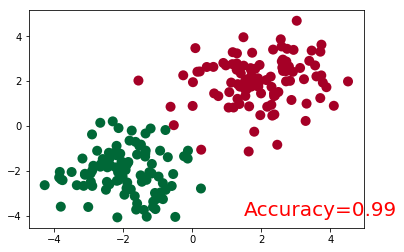

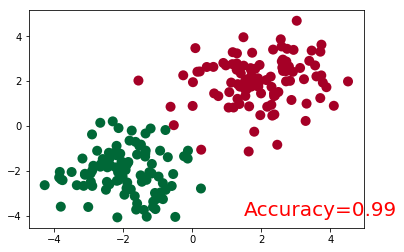

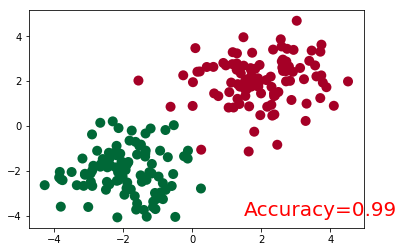

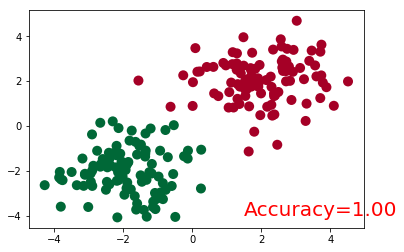

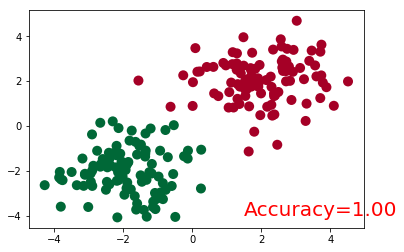

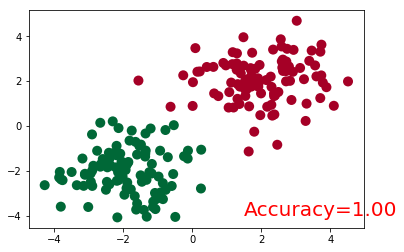

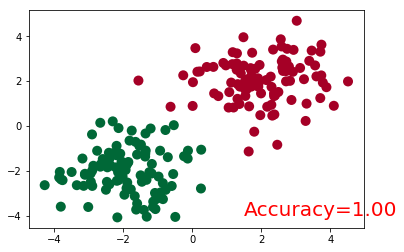

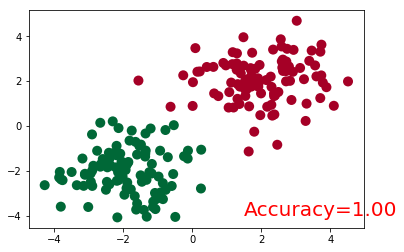

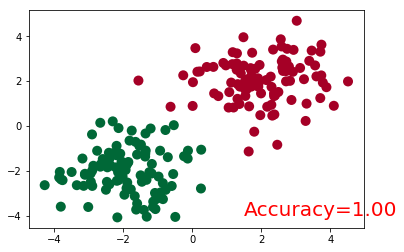

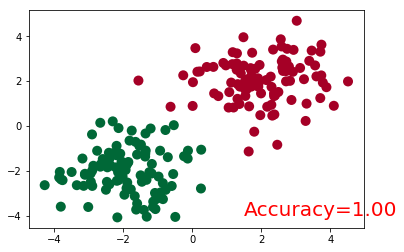

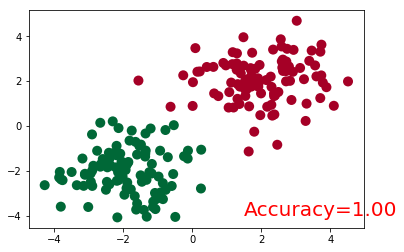

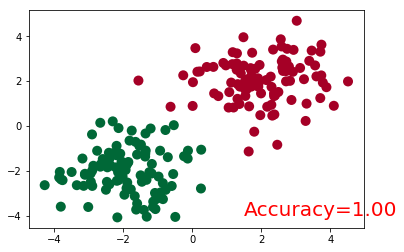

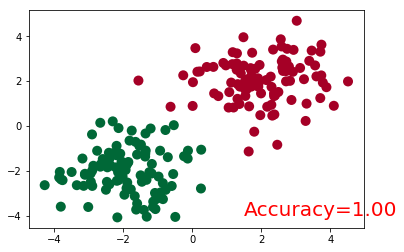

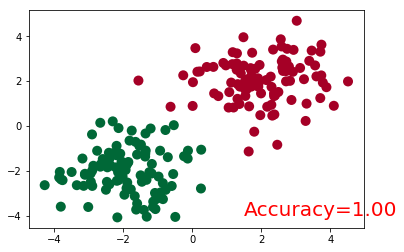

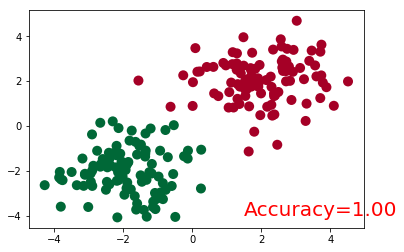

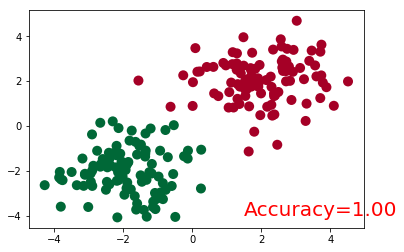

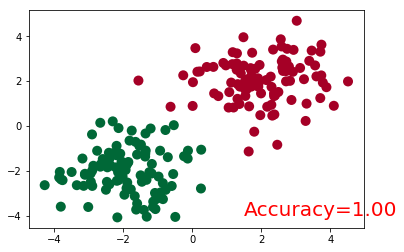

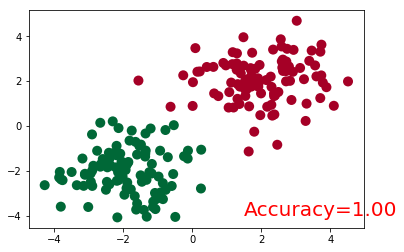

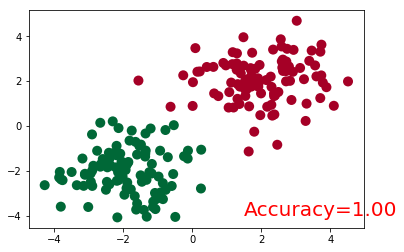

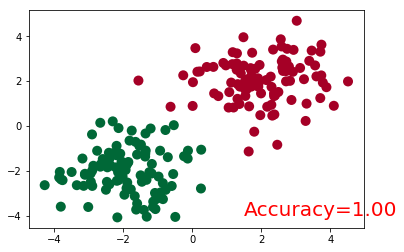

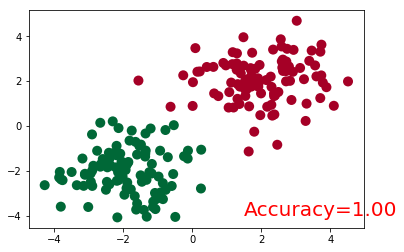

In [17]:
for t in range(100):
    out = net1(x)
    
    loss = loss_func(out, y)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if t%2 == 0:
        plt.cla()
        prediction = torch.max(out, 1)[1]
        pred_y = prediction.data.numpy().squeeze()
        target_y = y.data.numpy()
        plt.scatter(x.data.numpy()[:,0], x.data.numpy()[:,1],c=pred_y, s=100, lw=0, cmap = 'RdYlGn')
        accuracy = float((pred_y == target_y).astype(int).sum())/float(target_y.size)
        plt.text(1.5,-4,'Accuracy=%.2f'%accuracy, fontdict={'size':20,'color':'red'})
        plt.pause(0.1)
plt.ioff()
plt.show()

# 网络的保存

In [0]:
# 生成数据
x = torch.unsqueeze(torch.linspace(-1,1,100),dim=1)
y = x.pow(2) + 0.2*torch.rand(x.size())

In [0]:
def save():
    # save net1
    net1 = torch.nn.Sequential(
        torch.nn.Linear(1,10),
        torch.nn.ReLU(),
        torch.nn.Linear(10,1),
    )
    optimizer = torch.optim.SGD(net1.parameters(),lr=0.5)
    
    # 训练一百步
    for t in range(100):
        prediction = net1(x)
        loss = F.mse_loss(prediction, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # plot result
    plt.figure(1, figsize=(5, 3))
    plt.plot()
    plt.title('Net1')
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
    
    torch.save(net1, 'net.pkl') # 保存整个网络
    torch.save(net1.state_dict(),'net_params.pkl') #保存所有paremeters

# 网络的提取

In [0]:
def restore_net():
    net2 = torch.load('net.pkl')
    prediction = net2(x)
    
    # plot result
    plt.plot()
    plt.title('Net2')
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
    
    
def restore_params():
    # restore only the parameters in net1 to net3
    net3 =  torch.nn.Sequential(
        torch.nn.Linear(1,10),
        torch.nn.ReLU(),
        torch.nn.Linear(10,1),
    )
    net3.load_state_dict(torch.load('net_params.pkl'))
    prediction = net3(x)
    
    # plot result
    plt.plot()
    plt.title('Net3')
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
    plt.show()


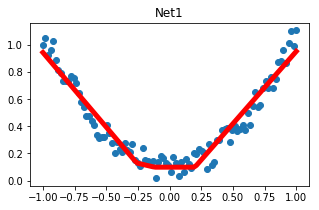

In [21]:
save()

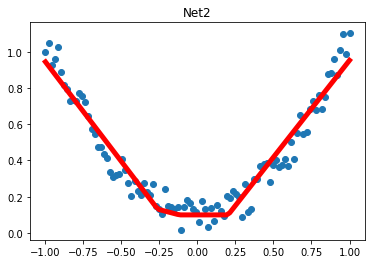

In [22]:
# restore entire net (may slow)
restore_net()

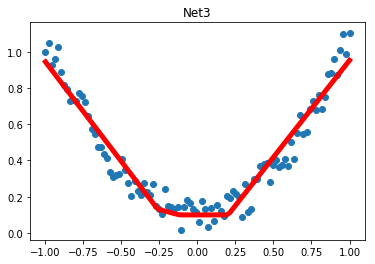

In [23]:
restore_params()

# 批训练

In [0]:
import torch.utils.data as Data

In [0]:
# 定义 batch size

BATCH_SIZE = 5

x = torch.linspace(1,10,10)
y = torch.linspace(10,1,10)

In [26]:
torch_dataset = Data.TensorDataset(x, y)
loader = Data.DataLoader(
    
    dataset=torch_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=2,
)

for epoch in range(3):
    for step, (batch_x, batch_y) in enumerate(loader):
        # training
        print('Epoch:',epoch,'|Step:',step,'|batch x:',batch_x.numpy(),'|batch y:',batch_y.numpy())

Epoch: 0 |Step: 0 |batch x: [2. 8. 4. 5. 6.] |batch y: [9. 3. 7. 6. 5.]
Epoch: 0 |Step: 1 |batch x: [ 1.  7.  9.  3. 10.] |batch y: [10.  4.  2.  8.  1.]
Epoch: 1 |Step: 0 |batch x: [10.  6.  8.  3.  2.] |batch y: [1. 5. 3. 8. 9.]
Epoch: 1 |Step: 1 |batch x: [5. 9. 1. 4. 7.] |batch y: [ 6.  2. 10.  7.  4.]
Epoch: 2 |Step: 0 |batch x: [5. 2. 6. 3. 7.] |batch y: [6. 9. 5. 8. 4.]
Epoch: 2 |Step: 1 |batch x: [ 8.  4.  1.  9. 10.] |batch y: [ 3.  7. 10.  2.  1.]


# 优化策略

In [0]:
# 生成数据
x = torch.unsqueeze(torch.linspace(-1,1,1000),dim=1)
y = x.pow(2) + 0.1*torch.normal(torch.zeros(*x.size()))

In [0]:
# 定义超参数
LR = 0.01
BATCH_SIZE = 32
EPOCH = 12

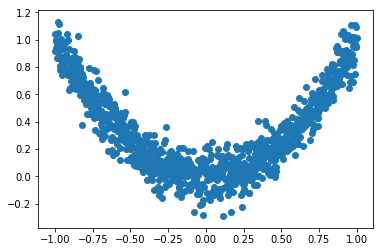

In [30]:
# plot dataset
plt.scatter(x.numpy(), y.numpy())
plt.show()

In [0]:
# put dateset into torch dataset
torch_dataset = Data.TensorDataset(x,y)
loader = Data.DataLoader(
    dataset = torch_dataset,
    batch_size = BATCH_SIZE,
    shuffle = True,
    num_workers = 2,
)

In [0]:
# 定义 default network
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(1,20)
        self.predict = torch.nn.Linear(20,1)
        
    def forward(self,x):
        x = torch.relu(self.hidden(x))
        x = self.predict(x)
        return x
    
if __name__ == '__main__':
    # different nets
    net_SGD         = Net()
    net_Momentum    = Net()
    net_RMSprop     = Net()
    net_Adam        = Net()
    nets = [net_SGD, net_Momentum, net_RMSprop, net_Adam]

    # different optimizers
    opt_SGD         = torch.optim.SGD(net_SGD.parameters(), lr=LR)
    opt_Momentum    = torch.optim.SGD(net_Momentum.parameters(), lr=LR, momentum=0.8)
    opt_RMSprop     = torch.optim.RMSprop(net_RMSprop.parameters(), lr=LR, alpha=0.9)
    opt_Adam        = torch.optim.Adam(net_Adam.parameters(), lr=LR, betas=(0.9, 0.99))
    optimizers = [opt_SGD, opt_Momentum, opt_RMSprop, opt_Adam]

    loss_func = torch.nn.MSELoss()
    losses_his = [[], [], [], []]   # record loss

Epoch:  0
Epoch:  1
Epoch:  2
Epoch:  3
Epoch:  4
Epoch:  5
Epoch:  6
Epoch:  7
Epoch:  8
Epoch:  9
Epoch:  10
Epoch:  11


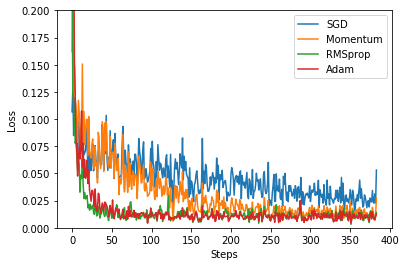

In [34]:
# training
    for epoch in range(EPOCH):
        print('Epoch: ', epoch)
        for step, (b_x, b_y) in enumerate(loader):          # for each training step
            for net, opt, l_his in zip(nets, optimizers, losses_his):
                output = net(b_x)              # get output for every net
                loss = loss_func(output, b_y)  # compute loss for every net
                opt.zero_grad()                # clear gradients for next train
                loss.backward()                # backpropagation, compute gradients
                opt.step()                     # apply gradients
                l_his.append(loss.data.numpy())     # loss recoder

    labels = ['SGD', 'Momentum', 'RMSprop', 'Adam']
    for i, l_his in enumerate(losses_his):
        plt.plot(l_his, label=labels[i])
    plt.legend(loc='best')
    plt.xlabel('Steps')
    plt.ylabel('Loss')
    plt.ylim((0, 0.2))
    plt.show()